# Investigate Difference in Mean Time in Hospital Between Diabetic Men and Women

### Introdution

Begin by providing some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal.

Clearly state the question you will try to answer with your project. Your question should involve one or more random variables of interest, spread across two or more categories that are interesting to compare. For example, you could consider the annual maxima river flow at two different locations along a river, or perhaps gender diversity at different universities. Of the response variable, identify one location parameter (mean, median, quantile, etc.) and one scale parameter (standard deviation, inter-quartile range, etc.) that would be useful in answering your question. Justify your choices.

UPDATE (Mar 1, 2022): If it doesn’t make sense to infer a scale parameter, you can choose another parameter, or choose a second variable altogether. Ultimately, we’re looking for a comprehensive inference analysis on one parameter spread across 2+ groups (with at least one hypothesis test), plus a bit more (such as an investigation on the variance, a quantile, or a different variable). In total, you should use both bootstrapping and asymptotics somewhere in your report at least once each. Also, your hypothesis test(s) need not be significant: it is perfectly fine to write a report claiming no significant findings (i.e. your p-value is large).

Identify and describe the dataset that will be used to answer the question. Remember, this dataset is allowed to contain more variables than you need – feel free to drop them!

Also, be sure to frame your question/objectives in terms of what is already known in the literature. Be sure to include at least two scientific publications that can help frame your study (you will need to include these in the References section). We have no specific citation style requirements, but be consistent.

- Background information: Why is it important? Cite some relevant literature
- What is your (inferential) research question?
- What is your population of interest?
- How do you collect your data?
- What is your point estimate? (e.g., mean difference between male and female income, proportions of Democrats voters, etc.)
- State your hypothesis if applicable

### Preliminary Results

- Demonstrate that the dataset can be read from the web into R.
- Clean and wrangle your data into a tidy format.
- Plot the relevant raw data, tailoring your plot in a way that addresses your question.
- Compute estimates of the parameter you identified across your groups. Present this in a table. If relevant, include these estimates in your plot.

Be sure to not print output that takes up a lot of screen space.

In [3]:
library(tidyverse)
library(infer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [19]:
diabetes_data <- read_csv("https://raw.githubusercontent.com/Yanjun0526/STAT201Project/main/diabetic_data.csv") |>
    filter(gender != "Unknown/Invalid") |> 
    select(gender, time_in_hospital)

Rows: 101766 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (37): race, gender, age, weight, payer_code, medical_specialty, diag_1, ...
dbl (13): encounter_id, patient_nbr, admission_type_id, discharge_dispositio...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [20]:
diabetes_data |>
    select(gender, time_in_hospital) |>
    group_by(gender) |> 
    tally()

gender,n
<chr>,<int>
Female,54708
Male,47055


In [33]:
diabetes_data |>
    group_by(gender) |> 
    summarize(mean_time_in_hospital = mean(time_in_hospital))

gender,mean_time_in_hospital
<chr>,<dbl>
Female,4.478797
Male,4.299777


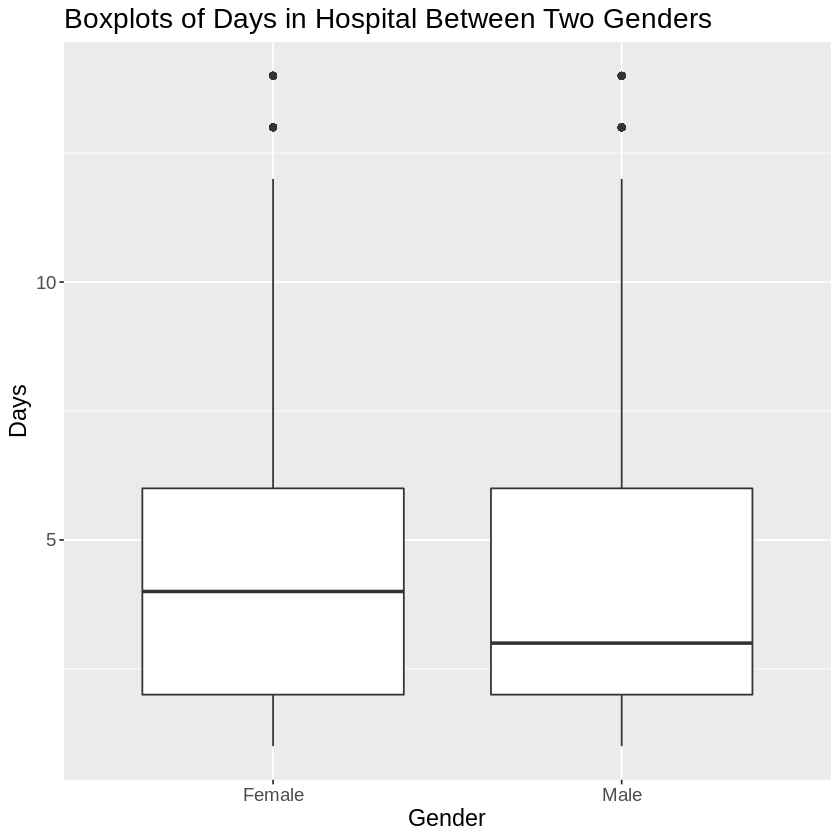

In [32]:
boxplots <- 
    diabetes_data %>%  
    ggplot(aes(x = gender, y = time_in_hospital)) + 
    geom_boxplot() + 
    ylab("Days") +
    xlab("Gender") +
    ggtitle("Boxplots of Days in Hospital Between Two Genders") +
    theme(text = element_text(size=14)) 

boxplots

### Methods: Plan
The previous sections will carry over to your final report (you’ll be allowed to improve them based on feedback you get). Begin this Methods section with a brief description of “the good things” about this report – specifically, in what ways is this report trustworthy?

Continue by explaining why the plot(s) and estimates that you produced are not enough to give to a stakeholder, and what you should provide in addition to address this gap. Make sure your plans include at least one hypothesis test and one confidence interval. If possible, compare both the bootstrapping and asymptotics methods.

Finish this section by reflecting on how your final report might play out:

- What do you expect to find?
- What impact could such findings have?
- What future questions could this lead to?


### References

At least two citations of literature relevant to the project. The citation format is your choice – just be consistent. Make sure to cite the source of your data as well.